In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-traffic/Cleaned_dataset.csv


**Figure out which combo of time/weather/road features creates the most dangerous crashes, then build a model that predicts when those deadly conditions will occur."**

In [2]:
df=pd.read_csv('/kaggle/input/cleaned-traffic/Cleaned_dataset.csv')

In [3]:
df.drop(df[df['Year'] == 2023].index, inplace=True)
df.shape

(5819530, 26)

In [4]:
df.columns

Index(['Start_Time', 'Distance(km)', 'State', 'Temperature(C)', 'Humidity(%)',
       'Pressure(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour',
       'Severity_Group'],
      dtype='object')

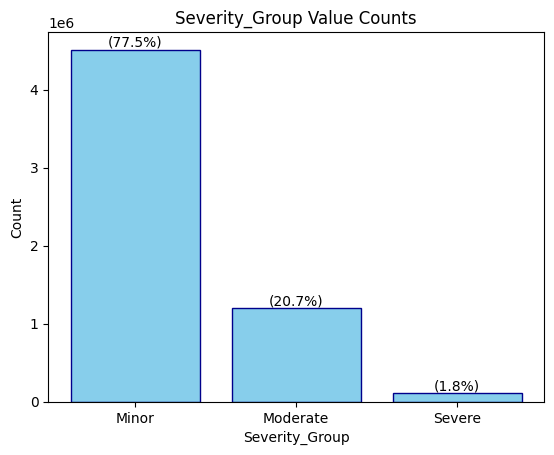

In [5]:

# Value counts
counts = df['Severity_Group'].value_counts()
percentages = counts / counts.sum() * 100

# Plot
plt.figure()
bars = plt.bar(counts.index.astype(str), counts.values,color='skyblue',edgecolor='darkblue',  )

# Labels on top
for bar, count, pct in zip(bars, counts.values, percentages.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'({pct:.1f}%)',
        ha='center',
        va='bottom'
    )

plt.xlabel('Severity_Group')
plt.ylabel('Count')
plt.title('Severity_Group Value Counts')
plt.show()


Let's see if this is similar in other patterns too

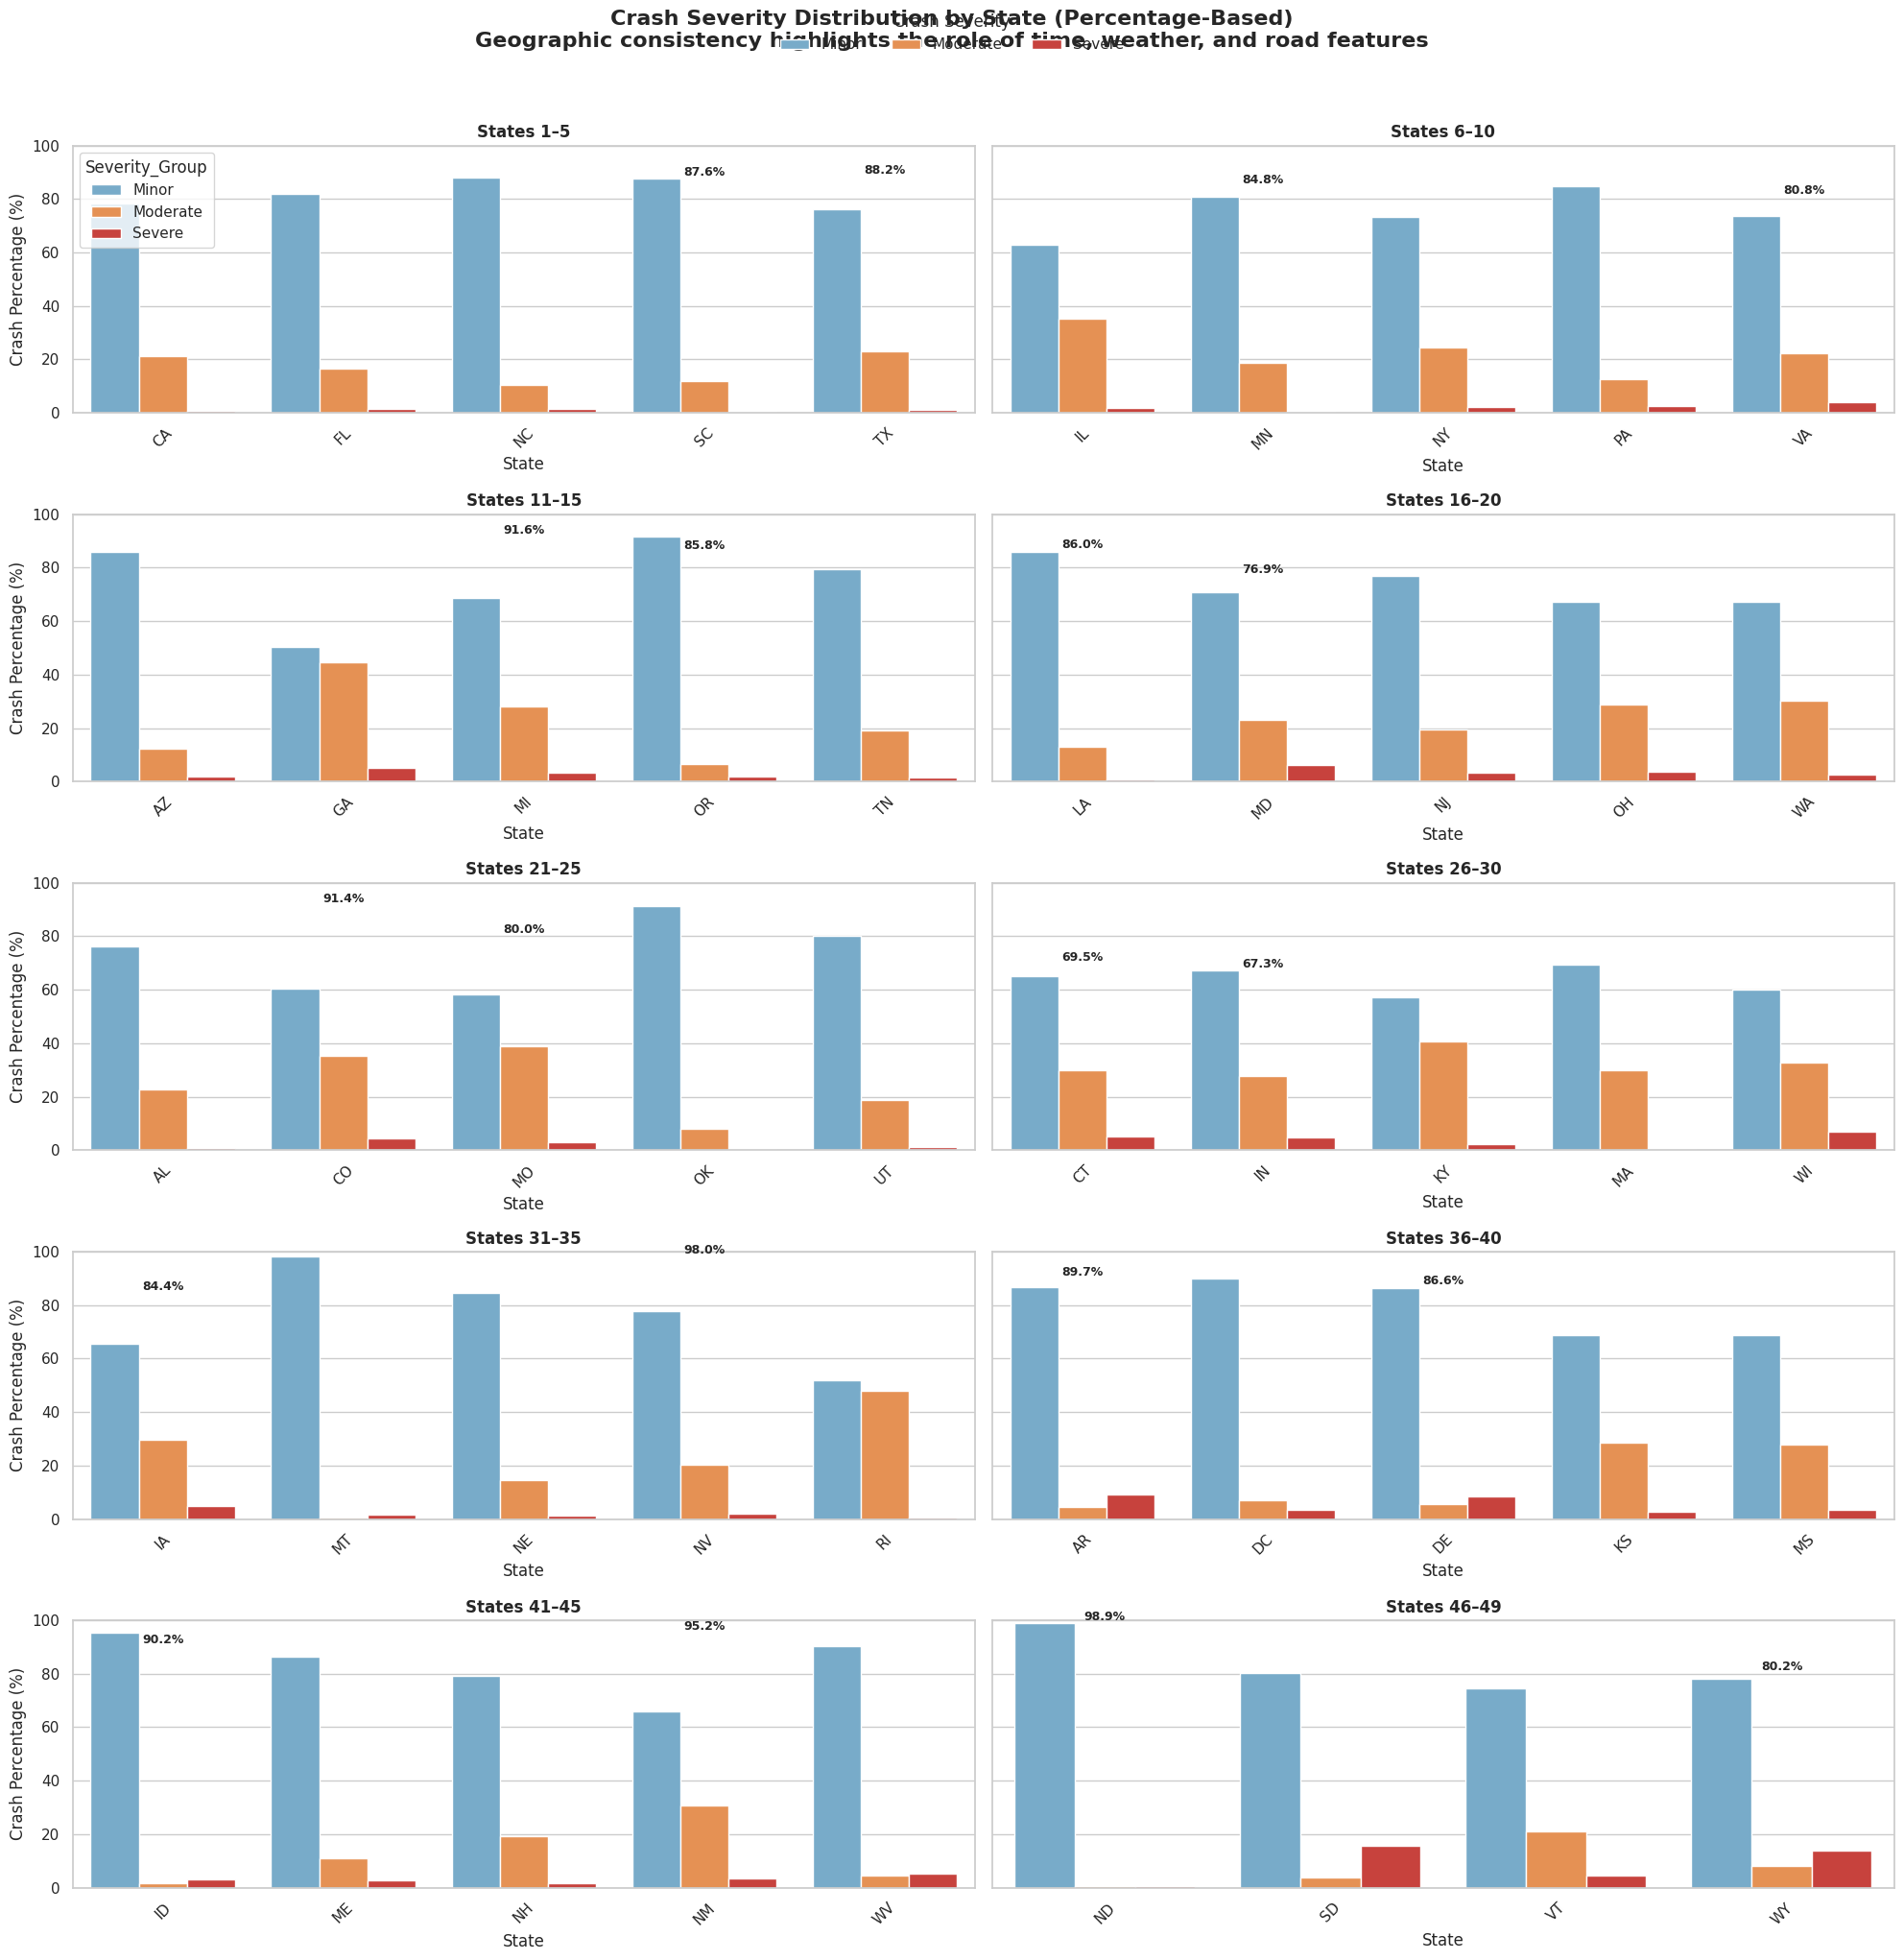

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_theme(style="whitegrid", font_scale=1.0)

# Sort states by total crashes
states_sorted = df['State'].value_counts().index.tolist()

# ---- Compute counts ----
state_severity = (
    df.groupby(['State', 'Severity_Group'])
      .size()
      .reset_index(name='Count')
)

# ---- Convert counts to percentages within each state ----
state_severity['Percentage'] = (
    state_severity['Count'] /
    state_severity.groupby('State')['Count'].transform('sum') * 100
)

# Parameters
states_per_plot = 5
plots_per_row = 2
num_plots = math.ceil(len(states_sorted) / states_per_plot)
num_rows = math.ceil(num_plots / plots_per_row)

# Subplots
fig, axes = plt.subplots(
    num_rows,
    plots_per_row,
    figsize=(20, num_rows * 4),
    sharey=True
)

axes = axes.flatten()

palette = {
    'Minor': '#6baed6',
    'Moderate': '#fd8d3c',
    'Severe': '#de2d26'
}

# Plot each group
for i in range(num_plots):
    start = i * states_per_plot
    end = start + states_per_plot
    subset_states = states_sorted[start:end]
    ax = axes[i]

    subset = state_severity[
        state_severity['State'].isin(subset_states)
    ]

    sns.barplot(
        data=subset,
        x='State',
        y='Percentage',
        hue='Severity_Group',
        palette=palette,
        ax=ax
    )

    ax.set_title(
        f"States {start+1}–{min(end, len(states_sorted))}",
        fontsize=12,
        weight='bold'
    )
    ax.set_xlabel("State")
    ax.set_ylabel("Crash Percentage (%)")
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)

    # ---- Annotate TOP 2 percentages in each subplot ----
    top2 = subset.sort_values('Percentage', ascending=False).head(2)

    for _, row in top2.iterrows():
        x_pos = subset_states.index(row['State'])
        ax.text(
            x=x_pos,
            y=row['Percentage'] + 1.2,
            s=f"{row['Percentage']:.1f}%",
            ha='center',
            fontsize=9,
            weight='bold'
        )

    if i != 0:
        ax.legend_.remove()

# Remove unused axes
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Global legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Crash Severity",
    loc="upper center",
    ncol=3,
    frameon=False
)

plt.suptitle(
    "Crash Severity Distribution by State (Percentage-Based)\n"
    "Geographic consistency highlights the role of time, weather, and road features",
    fontsize=16,
    weight='bold',
    y=1.02
)

plt.tight_layout()
plt.show()


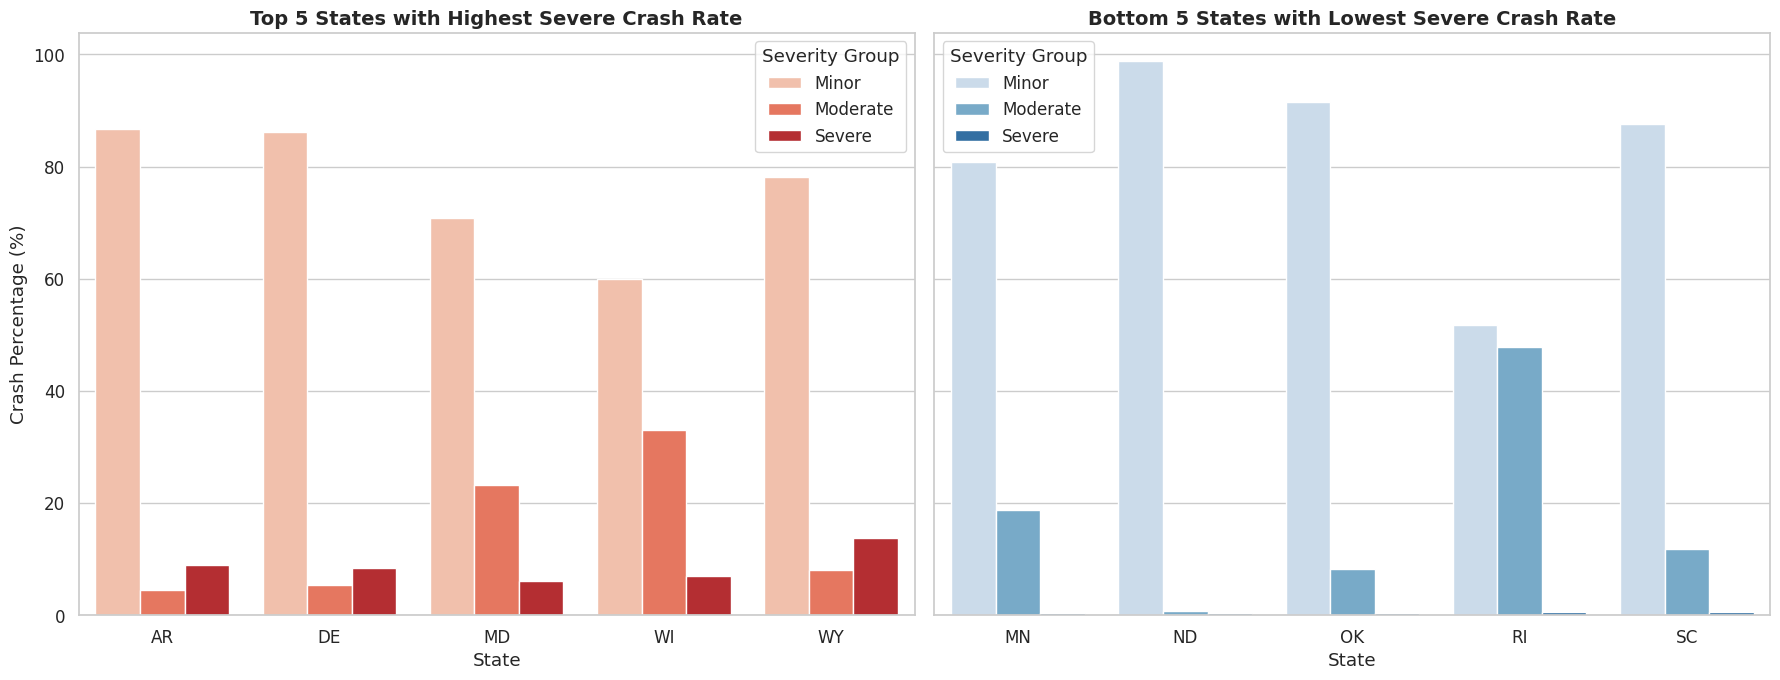

In [7]:
top_states = ['WY', 'AR', 'DE', 'WI', 'MD']
bottom_states = ['RI', 'SC', 'ND', 'MN', 'OK']
import pandas as pd

def prepare_data(states):
    temp = (
        df[df['State'].isin(states)]
        .groupby(['State', 'Severity_Group'])
        .size()
        .reset_index(name='Count')
    )

    # Convert counts to percentages within each state
    temp['Percentage'] = (
        temp['Count'] /
        temp.groupby('State')['Count'].transform('sum') * 100
    )
    return temp

top_data = prepare_data(top_states)
bottom_data = prepare_data(bottom_states)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# --- Top 5 States ---
sns.barplot(
    data=top_data,
    x='State',
    y='Percentage',
    hue='Severity_Group',
    palette='Reds',
    ax=axes[0]
)

axes[0].set_title('Top 5 States with Highest Severe Crash Rate', fontsize=14, weight='bold')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Crash Percentage (%)')
axes[0].legend(title='Severity Group')

# --- Bottom 5 States ---
sns.barplot(
    data=bottom_data,
    x='State',
    y='Percentage',
    hue='Severity_Group',
    palette='Blues',
    ax=axes[1]
)

axes[1].set_title('Bottom 5 States with Lowest Severe Crash Rate', fontsize=14, weight='bold')
axes[1].set_xlabel('State')
axes[1].set_ylabel('')
axes[1].legend(title='Severity Group')

plt.tight_layout()
plt.show()


In [8]:
print(df[df['State'].isin(top_states)]['State'].value_counts())
df[df['State'].isin(bottom_states)]['State'].value_counts()


State
MD    93587
WI    27399
AR    13338
DE    11199
WY     1234
Name: count, dtype: int64


State
SC    336817
MN    143685
OK     77949
RI     15457
ND      1956
Name: count, dtype: int64

Road Feature Comparison:
                 High_Risk_States (%)  Low_Risk_States (%)  Difference
Junction                        11.17                 5.12        6.05
Station                          1.82                 0.90        0.92
Amenity                          0.76                 0.49        0.26
Traffic_Calming                  0.27                 0.04        0.23
Bump                             0.02                 0.02        0.00
Turning_Loop                     0.00                 0.00        0.00
Roundabout                       0.00                 0.00        0.00
Give_Way                         0.34                 0.41       -0.07
No_Exit                          0.22                 0.38       -0.17
Railway                          0.37                 0.90       -0.53
Crossing                         8.14                10.53       -2.39
Traffic_Signal                  11.76                14.19       -2.43
Stop                             1.13               

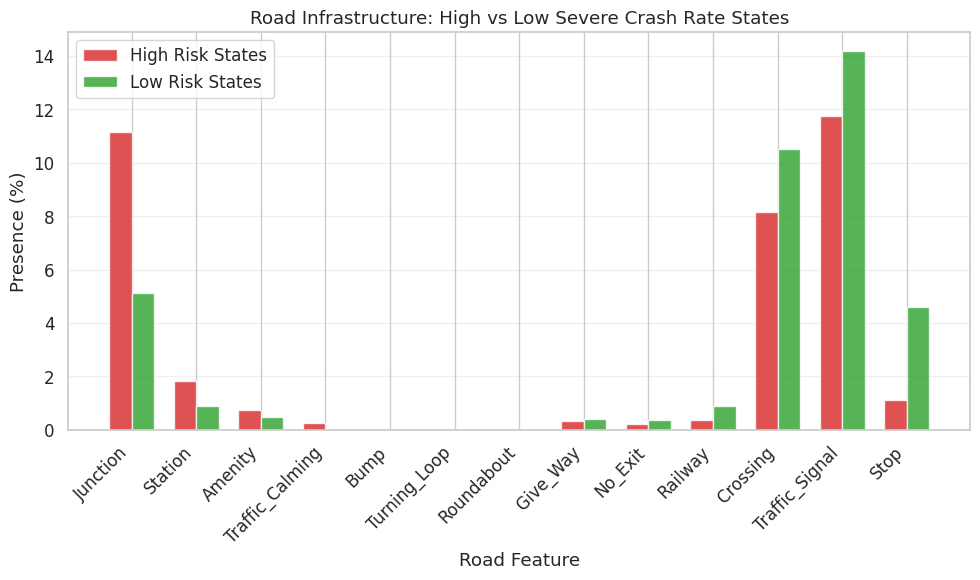

In [9]:
# Define the state groups (excluding WY and ND due to small sample sizes)
high_risk_states = ['AR', 'DE', 'MD', 'WI']
low_risk_states = ['SC', 'MN', 'OK', 'RI']

# Filter data for each group
high_risk_df = df[df['State'].isin(high_risk_states)]
low_risk_df = df[df['State'].isin(low_risk_states)]

# Road feature columns
road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Calculate average presence (mean) of each road feature for both groups
high_risk_features = high_risk_df[road_features].mean() * 100  # Convert to percentage
low_risk_features = low_risk_df[road_features].mean() * 100

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'High_Risk_States (%)': high_risk_features,
    'Low_Risk_States (%)': low_risk_features,
    'Difference': high_risk_features - low_risk_features
}).round(2)

comparison_df = comparison_df.sort_values('Difference', ascending=False)

print("Road Feature Comparison:")
print(comparison_df)

# Visualize
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(comparison_df))
width = 0.35

ax.bar([i - width/2 for i in x], comparison_df['High_Risk_States (%)'], 
       width, label='High Risk States', color='#d62728', alpha=0.8)
ax.bar([i + width/2 for i in x], comparison_df['Low_Risk_States (%)'], 
       width, label='Low Risk States', color='#2ca02c', alpha=0.8)

ax.set_xlabel('Road Feature')
ax.set_ylabel('Presence (%)')
ax.set_title('Road Infrastructure: High vs Low Severe Crash Rate States')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df.index, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

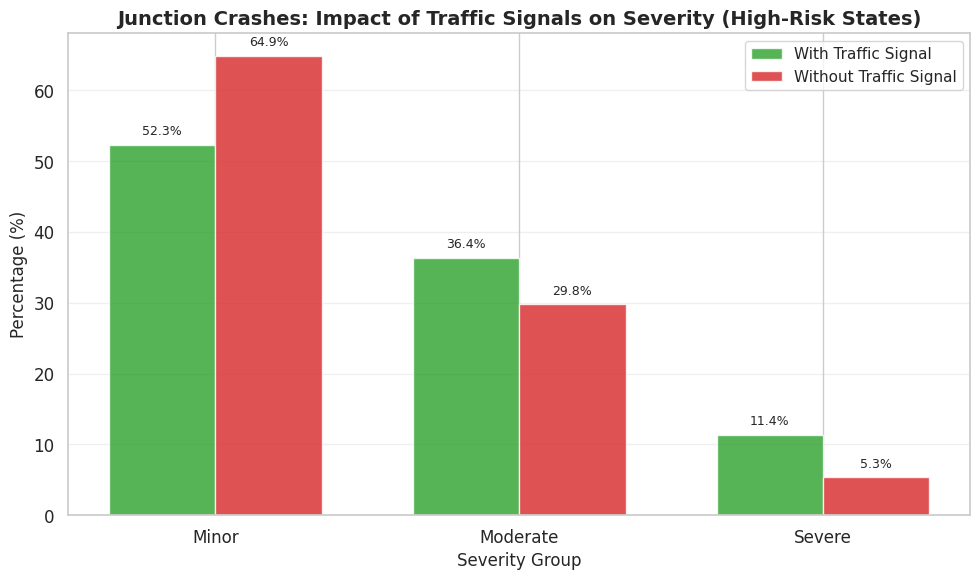


Numeric Comparison:
                With Traffic Signal  Without Traffic Signal
Severity_Group                                             
Minor                         52.27                   64.88
Moderate                      36.36                   29.77
Severe                        11.36                    5.35


In [10]:
# Filter high-risk states only
high_risk_junction_analysis = high_risk_df[high_risk_df['Junction'] == True]

# Compare severity at junctions WITH vs WITHOUT traffic signals
junction_with_signal = high_risk_junction_analysis[high_risk_junction_analysis['Traffic_Signal'] == True]['Severity_Group'].value_counts(normalize=True) * 100
junction_without_signal = high_risk_junction_analysis[high_risk_junction_analysis['Traffic_Signal'] == False]['Severity_Group'].value_counts(normalize=True) * 100

# Create comparison dataframe
comparison_data = pd.DataFrame({
    'With Traffic Signal': junction_with_signal,
    'Without Traffic Signal': junction_without_signal
}).fillna(0)

# Reorder by severity
severity_order = ['Minor', 'Moderate', 'Severe']
comparison_data = comparison_data.reindex(severity_order)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(comparison_data))
width = 0.35

ax.bar([i - width/2 for i in x], comparison_data['With Traffic Signal'], 
       width, label='With Traffic Signal', color='#2ca02c', alpha=0.8)
ax.bar([i + width/2 for i in x], comparison_data['Without Traffic Signal'], 
       width, label='Without Traffic Signal', color='#d62728', alpha=0.8)

ax.set_xlabel('Severity Group', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Junction Crashes: Impact of Traffic Signals on Severity (High-Risk States)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_data.index)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (with_sig, without_sig) in enumerate(zip(comparison_data['With Traffic Signal'], 
                                                  comparison_data['Without Traffic Signal'])):
    ax.text(i - width/2, with_sig + 1, f'{with_sig:.1f}%', ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, without_sig + 1, f'{without_sig:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nNumeric Comparison:")
print(comparison_data.round(2))

In [11]:
# Filter junctions in high-risk states
high_risk_junctions = high_risk_df[high_risk_df['Junction'] == True].copy()

# Separate by traffic signal presence
junctions_with_signal = high_risk_junctions[high_risk_junctions['Traffic_Signal'] == True]
junctions_without_signal = high_risk_junctions[high_risk_junctions['Traffic_Signal'] == False]

# Get hourly distribution of severe crashes for each type
severe_with_signal = junctions_with_signal[junctions_with_signal['Severity_Group'] == 'Severe']['Hour'].value_counts().sort_index()
severe_without_signal = junctions_without_signal[junctions_without_signal['Severity_Group'] == 'Severe']['Hour'].value_counts().sort_index()

# Normalize to percentages
severe_with_signal_pct = (severe_with_signal / severe_with_signal.sum() * 100)
severe_without_signal_pct = (severe_without_signal / severe_without_signal.sum() * 100)


In [12]:
# Check sample sizes at the junction+signal level
print("Junctions WITH signals:")
with_signal = high_risk_junctions[high_risk_junctions['Traffic_Signal'] == True]
print(f"Total: {len(with_signal)}")
print(with_signal['Severity_Group'].value_counts())

print("\nJunctions WITHOUT signals:")
without_signal = high_risk_junctions[high_risk_junctions['Traffic_Signal'] == False]
print(f"Total: {len(without_signal)}")
print(without_signal['Severity_Group'].value_counts())

Junctions WITH signals:
Total: 132
Severity_Group
Minor       69
Moderate    48
Severe      15
Name: count, dtype: int64

Junctions WITHOUT signals:
Total: 16123
Severity_Group
Minor       10461
Moderate     4800
Severe        862
Name: count, dtype: int64


In [13]:
# Check sample sizes at the junction+signal level
print("Junctions WITH signals:")
with_signal = high_risk_junctions[high_risk_junctions['Traffic_Signal'] == True]
print(f"Total: {len(with_signal)}")
print(with_signal['Severity_Group'].value_counts())

print("\nJunctions WITHOUT signals:")
without_signal = high_risk_junctions[high_risk_junctions['Traffic_Signal'] == False]
print(f"Total: {len(without_signal)}")
print(without_signal['Severity_Group'].value_counts())

Junctions WITH signals:
Total: 132
Severity_Group
Minor       69
Moderate    48
Severe      15
Name: count, dtype: int64

Junctions WITHOUT signals:
Total: 16123
Severity_Group
Minor       10461
Moderate     4800
Severe        862
Name: count, dtype: int64


In [14]:
# Focus on non-signaled junctions with severe crashes in high-risk states
severe_nonsignal_junctions = high_risk_junctions[
    (high_risk_junctions['Traffic_Signal'] == False) & 
    (high_risk_junctions['Severity_Group'] == 'Severe')
]

print(f"Total severe crashes at non-signaled junctions: {len(severe_nonsignal_junctions)}")
print(f"\nBreakdown by state:")
print(severe_nonsignal_junctions['State'].value_counts())

# Hour distribution
print(f"\nTop 10 hours for severe crashes:")
print(severe_nonsignal_junctions['Hour'].value_counts().sort_index().head(10))

# Weather conditions
print(f"\nTop weather conditions:")
print(severe_nonsignal_junctions['Weather_Condition'].value_counts().head(10))

Total severe crashes at non-signaled junctions: 862

Breakdown by state:
State
MD    552
WI    181
AR     83
DE     46
Name: count, dtype: int64

Top 10 hours for severe crashes:
Hour
0    31
1    18
2    30
3    21
4    27
5    42
6    43
7    55
8    44
9    32
Name: count, dtype: int64

Top weather conditions:
Weather_Condition
Fair                214
Clear               108
Cloudy              103
Mostly Cloudy       100
Overcast             62
Partly Cloudy        57
Light Rain           39
Scattered Clouds     28
Light Snow           19
Rain                 13
Name: count, dtype: int64


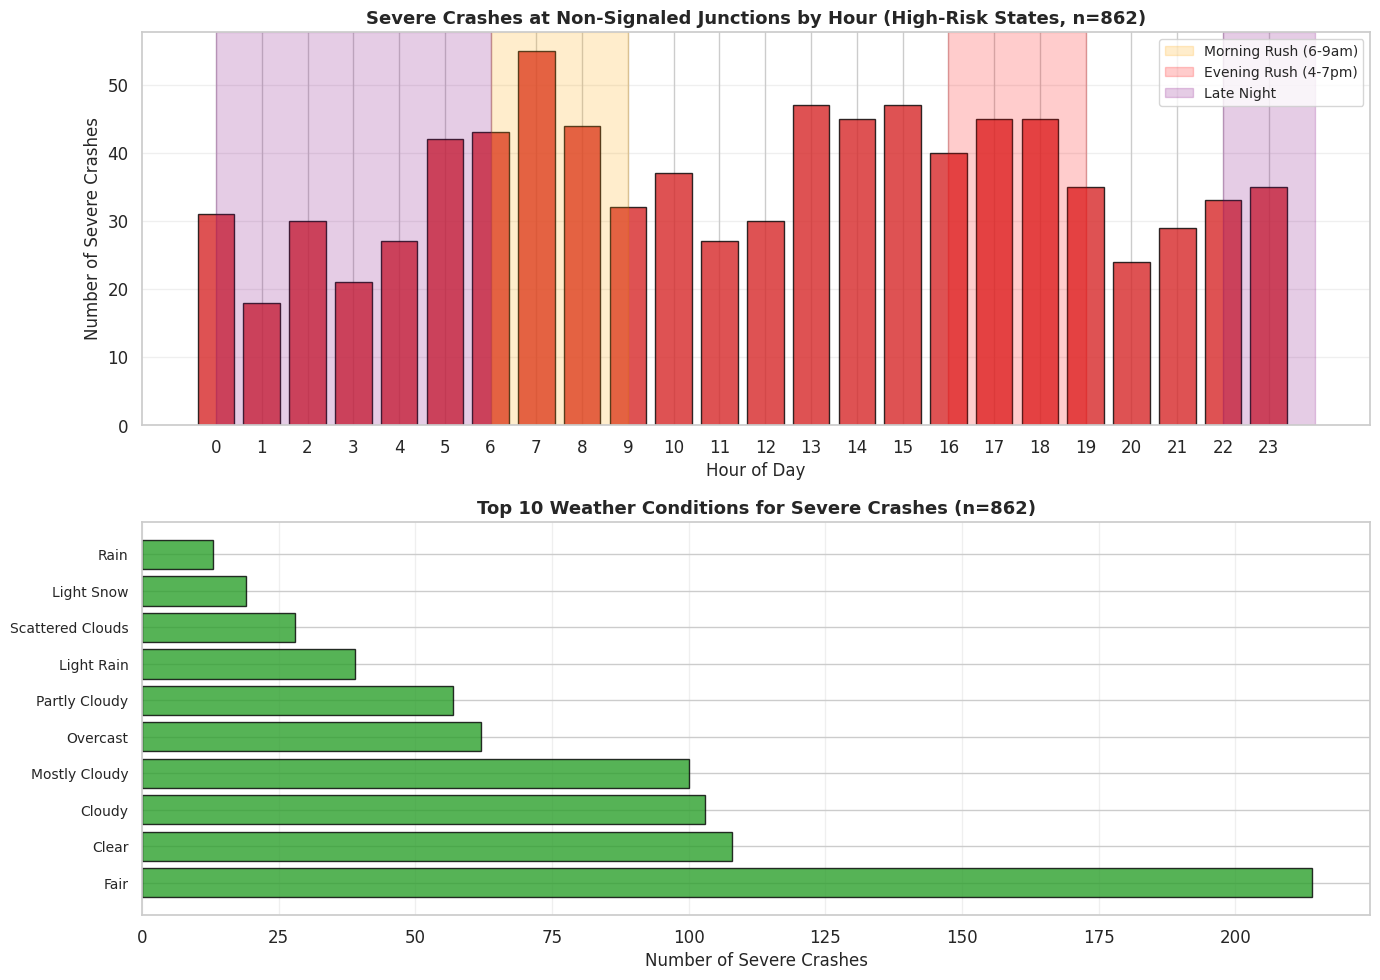


Time window breakdown:
Late Night (12am-6am): 169 (19.6%)
Morning Rush (6am-9am): 142 (16.5%)
Daytime (9am-4pm): 265 (30.7%)
Evening Rush (4pm-7pm): 130 (15.1%)
Night (7pm-12am): 156 (18.1%)


In [15]:
import matplotlib.pyplot as plt

# Hourly distribution
hourly_severe = severe_nonsignal_junctions['Hour'].value_counts().sort_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Hourly pattern
ax1 = axes[0]
ax1.bar(hourly_severe.index, hourly_severe.values, color='#d62728', alpha=0.8, edgecolor='black')
ax1.axvspan(6, 9, alpha=0.2, color='orange', label='Morning Rush (6-9am)')
ax1.axvspan(16, 19, alpha=0.2, color='red', label='Evening Rush (4-7pm)')
ax1.axvspan(22, 24, alpha=0.2, color='purple', label='Late Night')
ax1.axvspan(0, 6, alpha=0.2, color='purple')
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Number of Severe Crashes', fontsize=12)
ax1.set_title('Severe Crashes at Non-Signaled Junctions by Hour (High-Risk States, n=862)', 
              fontsize=13, fontweight='bold')
ax1.set_xticks(range(0, 24))
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Weather distribution
ax2 = axes[1]
weather_counts = severe_nonsignal_junctions['Weather_Condition'].value_counts().head(10)
ax2.barh(range(len(weather_counts)), weather_counts.values, color='#2ca02c', alpha=0.8, edgecolor='black')
ax2.set_yticks(range(len(weather_counts)))
ax2.set_yticklabels(weather_counts.index, fontsize=10)
ax2.set_xlabel('Number of Severe Crashes', fontsize=12)
ax2.set_title('Top 10 Weather Conditions for Severe Crashes (n=862)', 
              fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate percentages for time windows
late_night = hourly_severe[0:6].sum()
morning_rush = hourly_severe[6:9].sum()
day = hourly_severe[9:16].sum()
evening_rush = hourly_severe[16:19].sum()
night = hourly_severe[19:24].sum()

print(f"\nTime window breakdown:")
print(f"Late Night (12am-6am): {late_night} ({late_night/862*100:.1f}%)")
print(f"Morning Rush (6am-9am): {morning_rush} ({morning_rush/862*100:.1f}%)")
print(f"Daytime (9am-4pm): {day} ({day/862*100:.1f}%)")
print(f"Evening Rush (4pm-7pm): {evening_rush} ({evening_rush/862*100:.1f}%)")
print(f"Night (7pm-12am): {night} ({night/862*100:.1f}%)")

Weather Comparison (Severe vs All):
                     Severe_NonSignal_Junctions (%)  All_Crashes (%)  \
Weather_Condition                                                      
Clear                                         13.52            10.14   
Overcast                                       7.76             6.61   
Fair / Windy                                   0.88             0.35   
Snow                                           0.75             0.27   
Scattered Clouds                               3.50             3.07   
Light Freezing Rain                            0.50             0.09   
Light Rain                                     4.88             4.52   
Rain                                           1.63             1.32   
Cloudy / Windy                                 0.50             0.22   
Light Snow                                     2.38             2.11   

                     Difference  
Weather_Condition                
Clear                      3.37

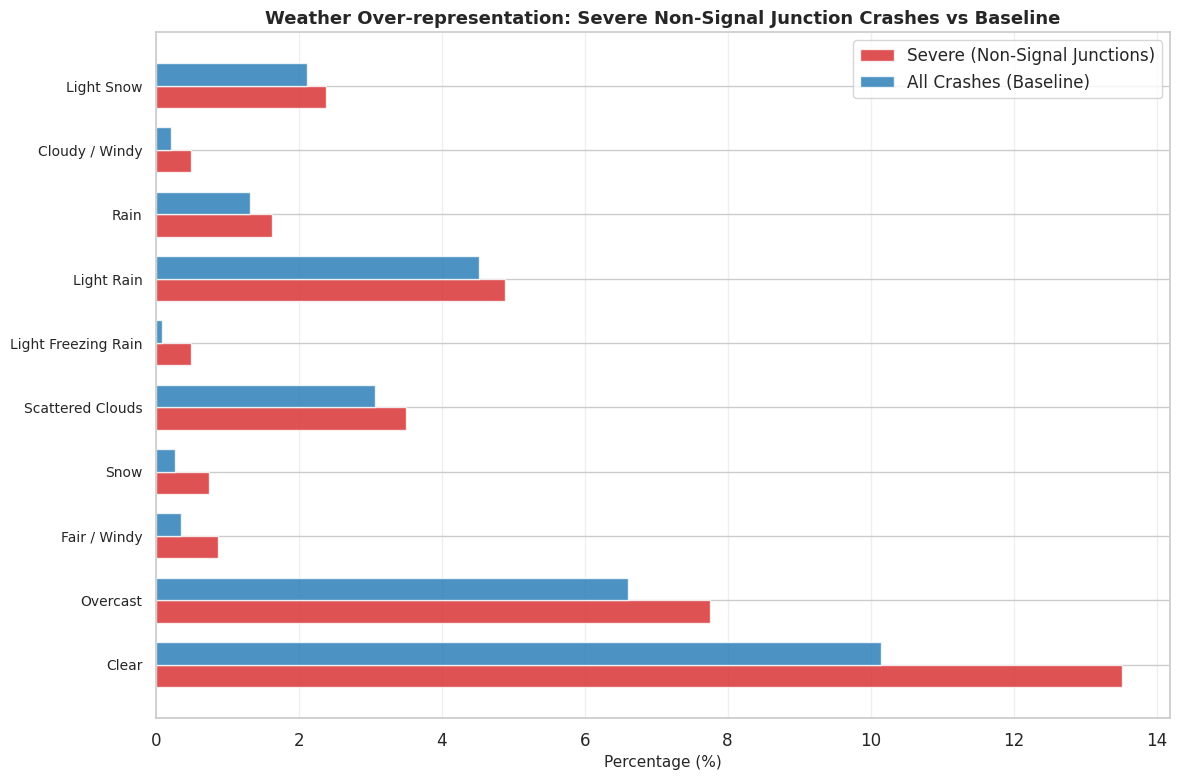

In [16]:
# Compare weather distribution: severe crashes vs ALL crashes in high-risk states
weather_severe = severe_nonsignal_junctions['Weather_Condition'].value_counts(normalize=True) * 100
weather_all = high_risk_df['Weather_Condition'].value_counts(normalize=True) * 100

# Create comparison
weather_comparison = pd.DataFrame({
    'Severe_NonSignal_Junctions (%)': weather_severe,
    'All_Crashes (%)': weather_all
}).fillna(0)

weather_comparison['Difference'] = weather_comparison['Severe_NonSignal_Junctions (%)'] - weather_comparison['All_Crashes (%)']
weather_comparison = weather_comparison.sort_values('Difference', ascending=False).head(10)

print("Weather Comparison (Severe vs All):")
print(weather_comparison.round(2))

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))
x = range(len(weather_comparison))
width = 0.35

ax.barh([i - width/2 for i in x], weather_comparison['Severe_NonSignal_Junctions (%)'], 
        width, label='Severe (Non-Signal Junctions)', color='#d62728', alpha=0.8)
ax.barh([i + width/2 for i in x], weather_comparison['All_Crashes (%)'], 
        width, label='All Crashes (Baseline)', color='#1f77b4', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels(weather_comparison.index, fontsize=10)
ax.set_xlabel('Percentage (%)', fontsize=11)
ax.set_title('Weather Over-representation: Severe Non-Signal Junction Crashes vs Baseline', 
             fontsize=13, fontweight='bold')
ax.legend()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

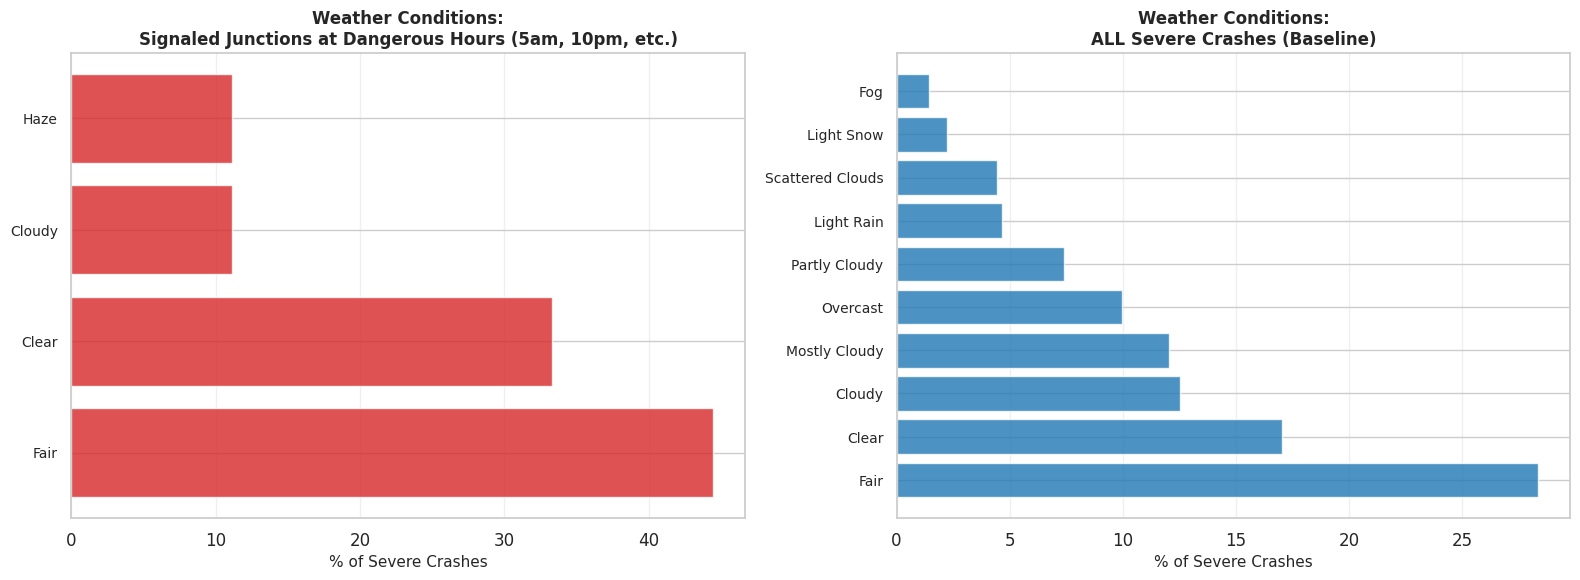

Top Weather Conditions at Signaled Junctions (Dangerous Hours):
Weather_Condition
Fair      44.44
Clear     33.33
Cloudy    11.11
Haze      11.11
Name: count, dtype: float64

Total crashes analyzed: 10


Baseline - Top Weather Conditions (All Severe Crashes):
Weather_Condition
Fair                28.35
Clear               17.03
Cloudy              12.54
Mostly Cloudy       12.02
Overcast             9.97
Partly Cloudy        7.38
Light Rain           4.64
Scattered Clouds     4.44
Light Snow           2.22
Fog                  1.42
Name: count, dtype: float64


In [17]:
# Filter severe crashes at junctions WITH traffic signals in high-risk states
severe_signal_junctions = high_risk_junctions[
    (high_risk_junctions['Traffic_Signal'] == True) & 
    (high_risk_junctions['Severity_Group'] == 'Severe')
].copy()

# Focus on the dangerous hours: 5am, 10pm (22), midnight (0), 3am, 11am
dangerous_hours = [0, 3, 5, 11, 22]
severe_dangerous_hours = severe_signal_junctions[severe_signal_junctions['Hour'].isin(dangerous_hours)]

# Get weather condition distribution
weather_dangerous = severe_dangerous_hours['Weather_Condition'].value_counts().head(10)
weather_dangerous_pct = (weather_dangerous / weather_dangerous.sum() * 100)

# Compare with ALL severe crashes (baseline)
all_severe = high_risk_df[high_risk_df['Severity_Group'] == 'Severe']
weather_baseline = all_severe['Weather_Condition'].value_counts().head(10)
weather_baseline_pct = (weather_baseline / weather_baseline.sum() * 100)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Weather at dangerous hours/signal junctions
ax1.barh(range(len(weather_dangerous_pct)), weather_dangerous_pct.values, color='#d62728', alpha=0.8)
ax1.set_yticks(range(len(weather_dangerous_pct)))
ax1.set_yticklabels(weather_dangerous_pct.index, fontsize=10)
ax1.set_xlabel('% of Severe Crashes', fontsize=11)
ax1.set_title('Weather Conditions:\nSignaled Junctions at Dangerous Hours (5am, 10pm, etc.)', 
              fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Baseline (all severe crashes)
ax2.barh(range(len(weather_baseline_pct)), weather_baseline_pct.values, color='#1f77b4', alpha=0.8)
ax2.set_yticks(range(len(weather_baseline_pct)))
ax2.set_yticklabels(weather_baseline_pct.index, fontsize=10)
ax2.set_xlabel('% of Severe Crashes', fontsize=11)
ax2.set_title('Weather Conditions:\nALL Severe Crashes (Baseline)', 
              fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Top Weather Conditions at Signaled Junctions (Dangerous Hours):")
print(weather_dangerous_pct.round(2))
print(f"\nTotal crashes analyzed: {len(severe_dangerous_hours)}")
print("\n" + "="*50)
print("\nBaseline - Top Weather Conditions (All Severe Crashes):")
print(weather_baseline_pct.round(2))

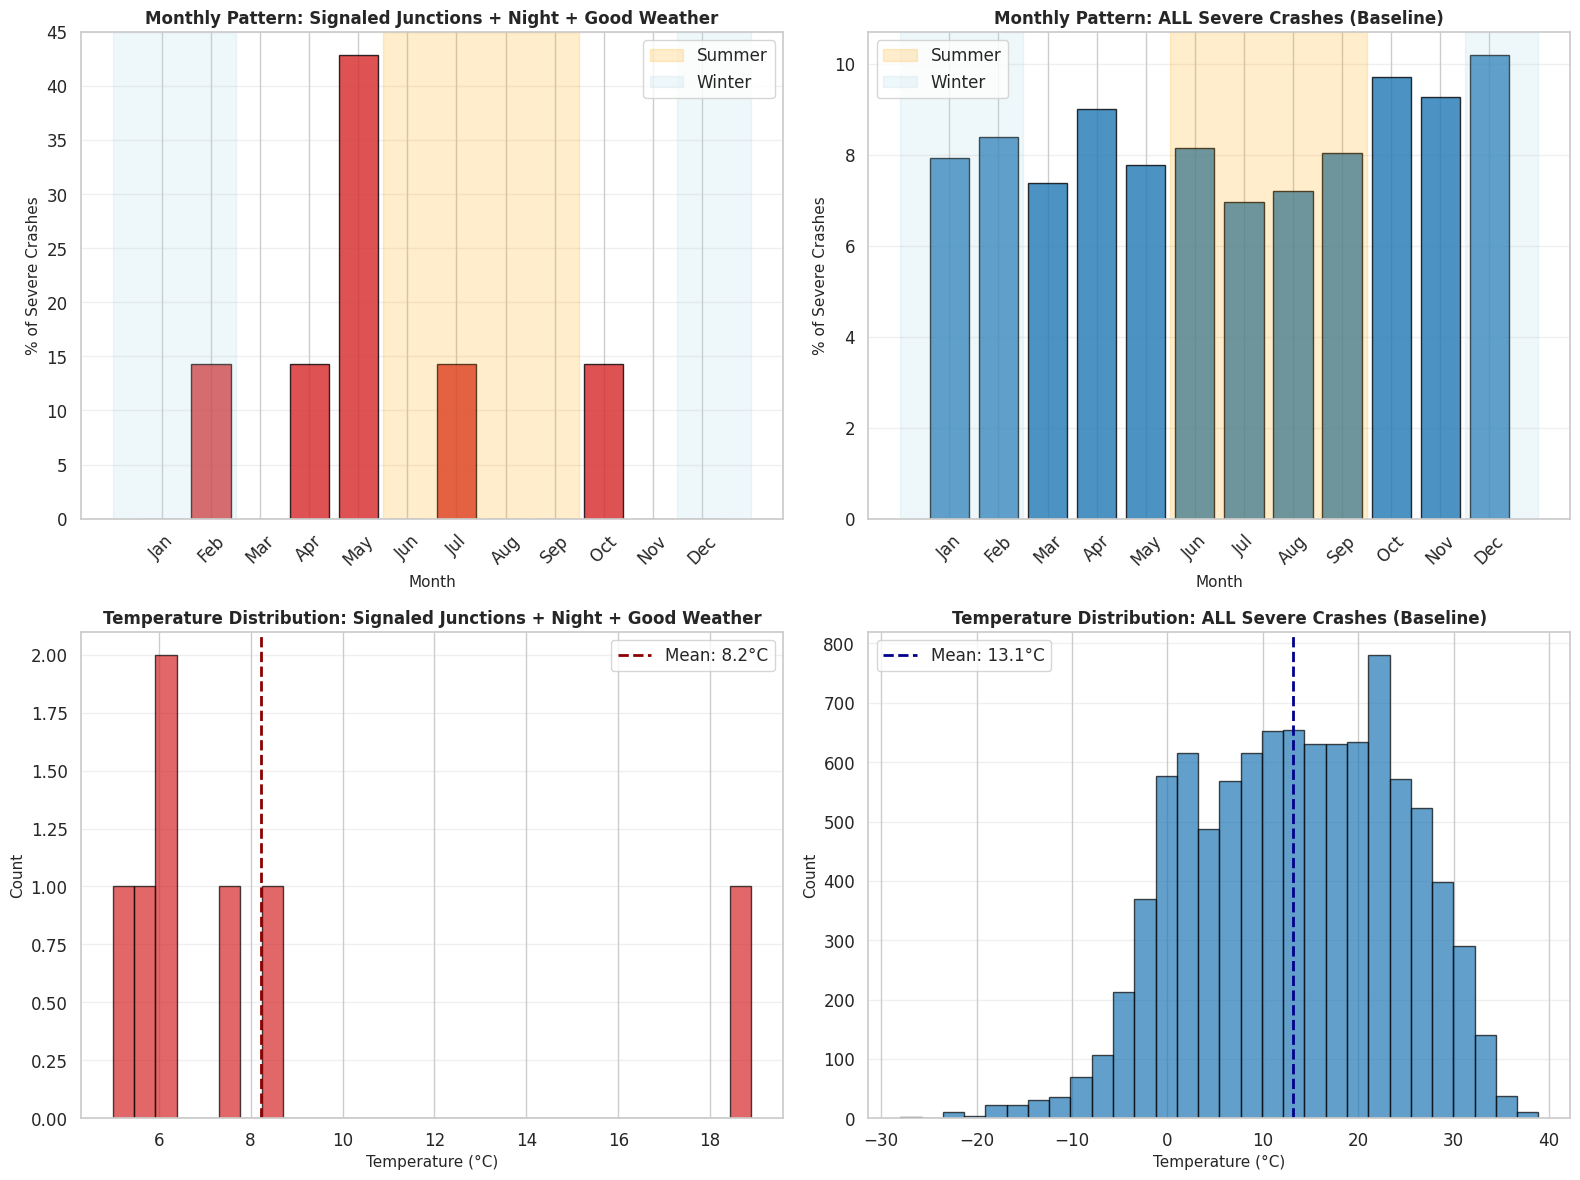

Monthly Distribution - Deadly Cocktail:
Month
2     14.29
4     14.29
5     42.86
7     14.29
10    14.29
Name: count, dtype: float64

Temperature Stats - Deadly Cocktail:
count     7.00
mean      8.23
std       4.84
min       5.00
25%       5.83
50%       6.11
75%       7.97
max      18.89
Name: Temperature(C), dtype: float64

Total deadly cocktail crashes: 7


In [18]:
# Filter severe crashes at signaled junctions during dangerous hours with Fair/Clear weather
severe_signal_goodweather = severe_dangerous_hours[
    severe_dangerous_hours['Weather_Condition'].isin(['Fair', 'Clear'])
]

# Get monthly distribution
monthly_dist = severe_signal_goodweather['Month'].value_counts().sort_index()
monthly_pct = (monthly_dist / monthly_dist.sum() * 100)

# Compare with baseline (all severe crashes)
baseline_monthly = all_severe['Month'].value_counts().sort_index()
baseline_monthly_pct = (baseline_monthly / baseline_monthly.sum() * 100)

# Also check temperature
temp_stats = severe_signal_goodweather['Temperature(C)'].describe()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Monthly distribution - Deadly cocktail
ax1 = axes[0, 0]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.bar(range(1, 13), monthly_pct.reindex(range(1, 13), fill_value=0), 
        color='#d62728', alpha=0.8, edgecolor='black')
ax1.axvspan(5.5, 9.5, alpha=0.2, color='orange', label='Summer')
ax1.axvspan(11.5, 13, alpha=0.2, color='lightblue', label='Winter')
ax1.axvspan(0, 2.5, alpha=0.2, color='lightblue')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('% of Severe Crashes', fontsize=11)
ax1.set_title('Monthly Pattern: Signaled Junctions + Night + Good Weather', 
              fontsize=12, fontweight='bold')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(months, rotation=45)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Baseline monthly
ax2 = axes[0, 1]
ax2.bar(range(1, 13), baseline_monthly_pct.reindex(range(1, 13), fill_value=0), 
        color='#1f77b4', alpha=0.8, edgecolor='black')
ax2.axvspan(5.5, 9.5, alpha=0.2, color='orange', label='Summer')
ax2.axvspan(11.5, 13, alpha=0.2, color='lightblue', label='Winter')
ax2.axvspan(0, 2.5, alpha=0.2, color='lightblue')
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('% of Severe Crashes', fontsize=11)
ax2.set_title('Monthly Pattern: ALL Severe Crashes (Baseline)', 
              fontsize=12, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(months, rotation=45)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Temperature distribution - Deadly cocktail
ax3 = axes[1, 0]
ax3.hist(severe_signal_goodweather['Temperature(C)'].dropna(), bins=30, 
         color='#d62728', alpha=0.7, edgecolor='black')
ax3.axvline(temp_stats['mean'], color='darkred', linestyle='--', linewidth=2, label=f'Mean: {temp_stats["mean"]:.1f}°C')
ax3.set_xlabel('Temperature (°C)', fontsize=11)
ax3.set_ylabel('Count', fontsize=11)
ax3.set_title('Temperature Distribution: Signaled Junctions + Night + Good Weather', 
              fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Temperature distribution - Baseline
ax4 = axes[1, 1]
ax4.hist(all_severe['Temperature(C)'].dropna(), bins=30, 
         color='#1f77b4', alpha=0.7, edgecolor='black')
baseline_temp_mean = all_severe['Temperature(C)'].mean()
ax4.axvline(baseline_temp_mean, color='darkblue', linestyle='--', linewidth=2, 
            label=f'Mean: {baseline_temp_mean:.1f}°C')
ax4.set_xlabel('Temperature (°C)', fontsize=11)
ax4.set_ylabel('Count', fontsize=11)
ax4.set_title('Temperature Distribution: ALL Severe Crashes (Baseline)', 
              fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Monthly Distribution - Deadly Cocktail:")
print(monthly_pct.round(2))
print("\nTemperature Stats - Deadly Cocktail:")
print(temp_stats.round(2))
print(f"\nTotal deadly cocktail crashes: {len(severe_signal_goodweather)}")

In [19]:
print(f"Total crashes in 'deadly cocktail': {len(severe_signal_goodweather)}")
print(f"\nBreakdown by state and month:")
print(severe_signal_goodweather.groupby(['State', 'Month']).size())

Total crashes in 'deadly cocktail': 7

Breakdown by state and month:
State  Month
MD     4        1
       5        3
       7        1
       10       1
WI     2        1
dtype: int64


1. CORRELATION ANALYSIS


/tmp/ipykernel_55/1685887189.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_nonsignal_junctions['Severity_Numeric'] = severe_nonsignal_junctions['Severity_Group'].map(severity_map)


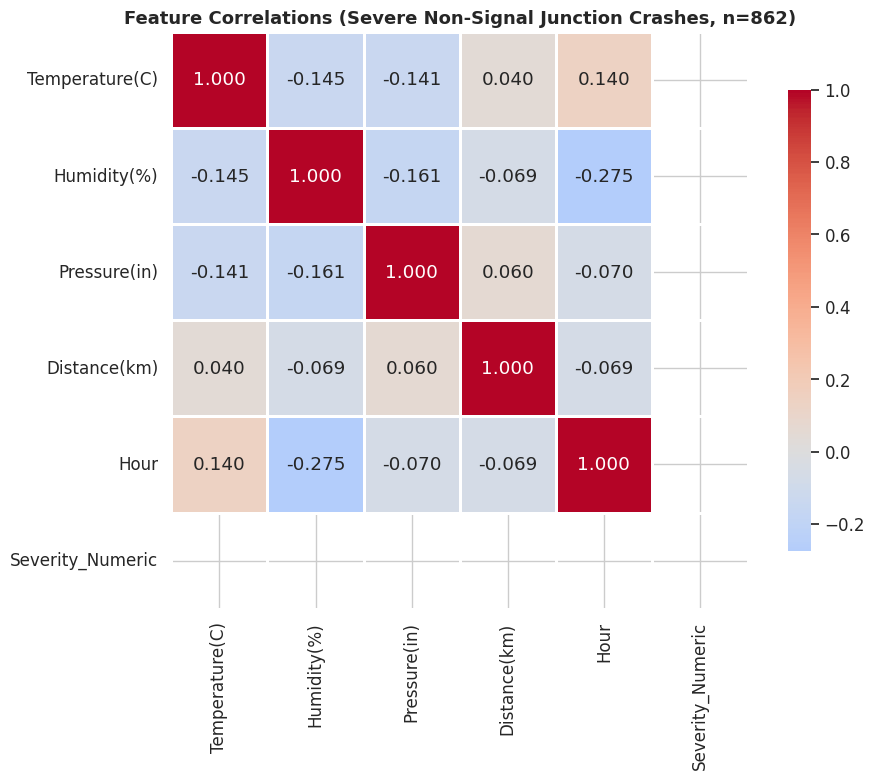


Correlations with Severity:
Temperature(C)     NaN
Humidity(%)        NaN
Pressure(in)       NaN
Distance(km)       NaN
Hour               NaN
Severity_Numeric   NaN
Name: Severity_Numeric, dtype: float64

2. UNEXPLORED ROAD FEATURES

Road Feature Presence:
          Severe_NonSignal (%)  All_Crashes (%)  Difference
Railway                   0.00             0.37       -0.37
Stop                      0.46             1.13       -0.67
Crossing                  0.35             8.14       -7.80


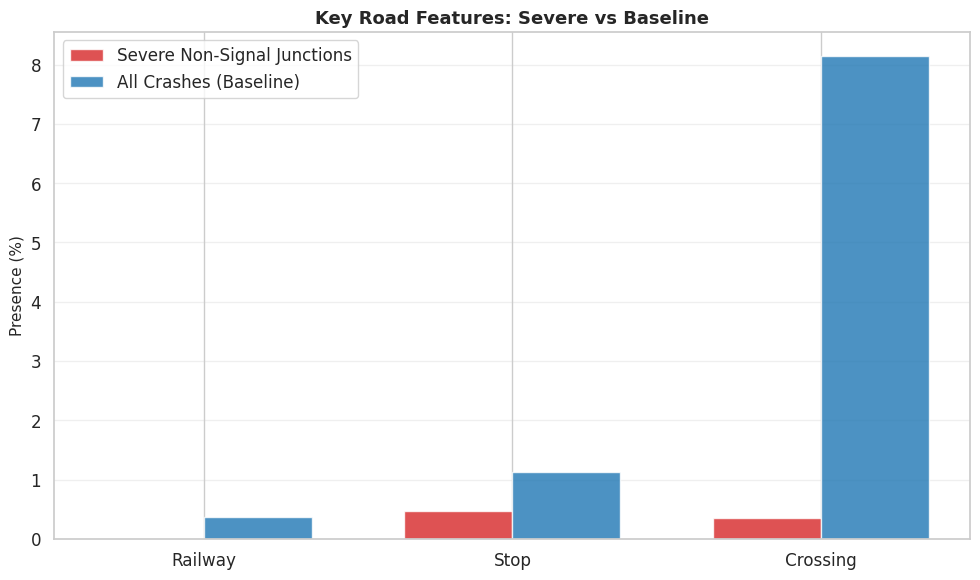


3. WHY IS MARYLAND SO DEADLY?

Maryland: 552 crashes (64%)
Others: 310 crashes (36%)

Maryland vs Others - Mean Values:
                Maryland  Other States  Difference
Hour               11.68         12.15       -0.48
Temperature(C)     12.25         10.05        2.21
Humidity(%)        69.75         67.85        1.91
Pressure(in)       29.90         29.75        0.15
Distance(km)        1.01          1.26       -0.26

Weather Distribution:
                   Maryland (%)  Other States (%)
Weather_Condition                                
Clear                     11.00             17.53
Cloudy                    15.89              8.12
Fair                      29.33             22.73
Mostly Cloudy             12.63             12.34
Overcast                   0.00             10.39
Partly Cloudy              9.16              0.00


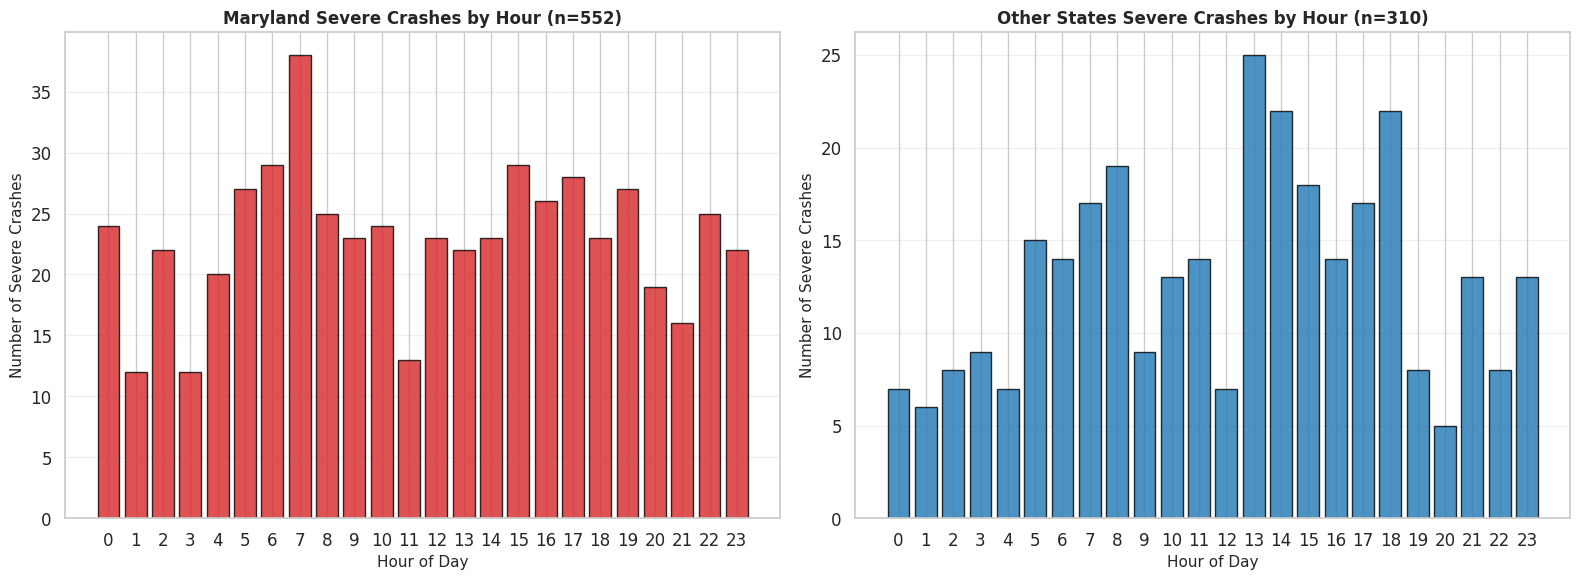


ANALYSIS COMPLETE!


In [20]:
import seaborn as sns

# ===== 1. CORRELATION HEATMAP =====
print("="*60)
print("1. CORRELATION ANALYSIS")
print("="*60)

# Focus on severe crashes at non-signaled junctions
numeric_features = ['Temperature(C)', 'Humidity(%)', 'Pressure(in)', 'Distance(km)', 'Hour']

# Create severity numeric (0=Minor, 1=Moderate, 2=Severe)
severity_map = {'Minor': 0, 'Moderate': 1, 'Severe': 2}
severe_nonsignal_junctions['Severity_Numeric'] = severe_nonsignal_junctions['Severity_Group'].map(severity_map)

# Calculate correlations
corr_data = severe_nonsignal_junctions[numeric_features + ['Severity_Numeric']].corr()

# Visualize
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlations (Severe Non-Signal Junction Crashes, n=862)', 
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelations with Severity:")
print(corr_data['Severity_Numeric'].sort_values(ascending=False))

# ===== 2. UNEXPLORED ROAD FEATURES =====
print("\n" + "="*60)
print("2. UNEXPLORED ROAD FEATURES")
print("="*60)

# Check Crossing, Railway, Stop at severe non-signal junctions vs baseline
key_features = ['Crossing', 'Railway', 'Stop']

severe_road = severe_nonsignal_junctions[key_features].mean() * 100
all_road = high_risk_df[key_features].mean() * 100

road_comp = pd.DataFrame({
    'Severe_NonSignal (%)': severe_road,
    'All_Crashes (%)': all_road,
    'Difference': severe_road - all_road
}).sort_values('Difference', ascending=False)

print("\nRoad Feature Presence:")
print(road_comp.round(2))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(road_comp))
width = 0.35

ax.bar([i - width/2 for i in x], road_comp['Severe_NonSignal (%)'], 
       width, label='Severe Non-Signal Junctions', color='#d62728', alpha=0.8)
ax.bar([i + width/2 for i in x], road_comp['All_Crashes (%)'], 
       width, label='All Crashes (Baseline)', color='#1f77b4', alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(road_comp.index)
ax.set_ylabel('Presence (%)', fontsize=11)
ax.set_title('Key Road Features: Severe vs Baseline', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ===== 3. MARYLAND DEEP-DIVE =====
print("\n" + "="*60)
print("3. WHY IS MARYLAND SO DEADLY?")
print("="*60)

# Compare MD severe crashes to other states
md_severe = severe_nonsignal_junctions[severe_nonsignal_junctions['State'] == 'MD']
other_severe = severe_nonsignal_junctions[severe_nonsignal_junctions['State'] != 'MD']

print(f"\nMaryland: {len(md_severe)} crashes (64%)")
print(f"Others: {len(other_severe)} crashes (36%)")

# Compare key characteristics
comparison_features = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Pressure(in)', 'Distance(km)']

md_stats = md_severe[comparison_features].describe().loc[['mean', '50%']]
other_stats = other_severe[comparison_features].describe().loc[['mean', '50%']]

print("\nMaryland vs Others - Mean Values:")
comparison_df = pd.DataFrame({
    'Maryland': md_stats.loc['mean'],
    'Other States': other_stats.loc['mean'],
    'Difference': md_stats.loc['mean'] - other_stats.loc['mean']
})
print(comparison_df.round(2))

# Weather comparison
print("\nWeather Distribution:")
md_weather = md_severe['Weather_Condition'].value_counts(normalize=True).head(5) * 100
other_weather = other_severe['Weather_Condition'].value_counts(normalize=True).head(5) * 100

weather_md_comp = pd.DataFrame({
    'Maryland (%)': md_weather,
    'Other States (%)': other_weather
}).fillna(0)
print(weather_md_comp.round(2))

# Hour distribution comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# MD hours
md_hours = md_severe['Hour'].value_counts().sort_index()
ax1.bar(md_hours.index, md_hours.values, color='#d62728', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Hour of Day', fontsize=11)
ax1.set_ylabel('Number of Severe Crashes', fontsize=11)
ax1.set_title(f'Maryland Severe Crashes by Hour (n={len(md_severe)})', 
              fontsize=12, fontweight='bold')
ax1.set_xticks(range(0, 24))
ax1.grid(axis='y', alpha=0.3)

# Other states hours
other_hours = other_severe['Hour'].value_counts().sort_index()
ax2.bar(other_hours.index, other_hours.values, color='#1f77b4', alpha=0.8, edgecolor='black')
ax2.set_xlabel('Hour of Day', fontsize=11)
ax2.set_ylabel('Number of Severe Crashes', fontsize=11)
ax2.set_title(f'Other States Severe Crashes by Hour (n={len(other_severe)})', 
              fontsize=12, fontweight='bold')
ax2.set_xticks(range(0, 24))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

In [ ]:
yes

# Model Evaluation

In [33]:
# Current distribution (assuming)
# Minor: ~4.4M (77%)
# Moderate: ~1.2M (20.8%)
# Severe: ~102K (1.8%)

# Create a STRATIFIED sample
from sklearn.model_selection import train_test_split

# Separate by severity
severe = df[df['Severity_Group'] == 'Severe']  # ~102K
moderate = df[df['Severity_Group'] == 'Moderate']  # ~1.2M
minor = df[df['Severity_Group'] == 'Minor']  # ~4.4M

print(f"Severe: {len(severe)}")
print(f"Moderate: {len(moderate)}")
print(f"Minor: {len(minor)}")

# Strategy: Keep ALL severe, undersample others
sample_size_per_class = len(severe) * 3  # 3x the severe count

moderate_sample = moderate.sample(n=min(sample_size_per_class, len(moderate)), random_state=42)
minor_sample = minor.sample(n=min(sample_size_per_class, len(minor)), random_state=42)

# Combine
df_balanced = pd.concat([severe, moderate_sample, minor_sample])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nBalanced dataset size: {len(df_balanced)}")
print(df_balanced['Severity_Group'].value_counts())

Severe: 104135
Moderate: 1203158
Minor: 4512237

Balanced dataset size: 728945
Severity_Group
Minor       312405
Moderate    312405
Severe      104135
Name: count, dtype: int64


In [34]:
# Option 1: Keep top 10-15, group rest as "Other"
top_weather = df['Weather_Condition'].value_counts().head(15).index
df['Weather_Simple'] = df['Weather_Condition'].apply(
    lambda x: x if x in top_weather else 'Other'
)

# Option 2: Frequency encoding (FAST for large datasets)
weather_freq = df['Weather_Condition'].value_counts(normalize=True).to_dict()
df['Weather_Frequency'] = df['Weather_Condition'].map(weather_freq)

In [35]:
# Target encoding (pre-calculate once, map fast)
state_severe_rate = df.groupby('State')['Severity_Group'].apply(
    lambda x: (x == 'Severe').mean()
).to_dict()

df['State_Risk'] = df['State'].map(state_severe_rate)

# Optional: Also encode volume
state_volume = np.log1p(df['State'].value_counts().to_dict())  # log transform
df['State_Volume_Log'] = df['State'].map(state_volume)

TypeError: loop of ufunc does not support argument 0 of type dict which has no callable log1p method